Dataset : https://github.com/ayehninnkhine/MyanmarNewsClassificationSystem

Demo Website : https://share.streamlit.io/thuraaung1601/automatic-myanmar-news-classification/main/app.py

Github : https://github.com/ThuraAung1601/Automatic-Myanmar-News-Classification

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Data preparation

In [2]:
dataset = "./mm-news-classification-dataset.csv"

In [3]:
data = pd.read_csv(dataset)
print(data.head())

   Unnamed: 0                                               News  Category
0           0  ဒီမိုကရေစီ_ရ_မှ_အမျှဝေ_ပါ_ဟု_မဝင်းမော်ဦး_တောင်...  Politics
1           1  ဒီမိုကရေစီ_အရေး_လူ့အခွင့်အရေး_တောင်းဆို_ဆန္ဒပြ...  Politics
2           2  ၂၀၁၅_ခုနှစ်_အထွေထွေရွေးကောက်ပွဲ_တွင်_အမျိုးသား...  Politics
3           3  လာမည့်_စက်တင်ဘာ_၁၉_ရက်_တွင်_မဝင်းမော်ဦး_ကျဆုံး...  Politics
4           4  တပ်မတော်ကာကွယ်ရေးဦးစီးချုပ်_ဗိုလ်ချုပ်မှူးကြီး...  Politics


In [4]:
data.isnull().sum()


Unnamed: 0    0
News          0
Category      0
dtype: int64

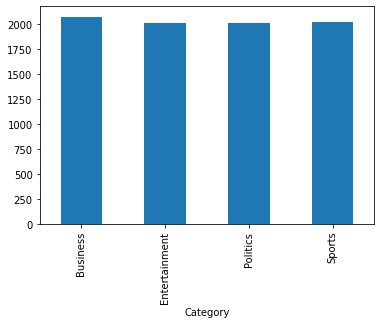

In [5]:
data['category_id'] = data['Category'].factorize()[0]
colslist = ['Index','News', 'Category', 'category_id']
data.columns = colslist
data.groupby('Category').Index.count().plot.bar(ylim=0)

In [6]:
stopwordslist = []
slist = []
with open("/content/stopword.txt", encoding = 'utf8') as stopwordsfile:
    stopwords = stopwordsfile.readlines()
    slist.extend(stopwords)
    for w in range(len(slist)):
        temp = slist[w]
        stopwordslist.append(temp.rstrip())


In [ ]:
!pip install pyidaungsu

In [7]:
import pyidaungsu as pds
import re
CleanPattern = re.compile(r'\d+|[၊။!-/:-@[-`{-~\t ]|[A-za-z0-9]')
def clean_sentence(sentence):
     sentence = sentence.replace("_"," ")
     sent = CleanPattern.sub(" ",sentence)
     return sent

def stop_word(sentence):
  new_sentence = []
  for word in sentence.split():
    if word not in stopwordslist:
      new_sentence.append(word)
  return(' '.join(new_sentence))

def tokenize(line):
    line = clean_sentence(line)
    sentence = pds.tokenize(line,form="word")
    sentence = ' '.join([str(elem) for elem in sentence])
    sentence = stop_word(sentence)
    return sentence
       
data['News'] = data['News'].apply(tokenize)
data.head(10)

,Index,News,Category,category_id
0,0,ဒီမိုကရေစီ အမျှ ဝေ မော်ဦး တောင်းဆို အရေးတော်ပု...,Politics,0
1,1,ဒီမိုကရေစီ အရေး လူ့ အခွင့် အရေး တောင်းဆို ဆန္ဒ...,Politics,0
2,2,ခုနှစ် အထွေထွေ ရွေးကောက်ပွဲ အမျိုးသား ဒီမိုကရေ...,Politics,0
3,3,စက်တင်ဘာ မဝင်း မော်ဦး ကျဆုံး ပြည့် ကျဆုံး ပတ်လ...,Politics,0
4,4,တပ်မတော် ကာကွယ် ဦးစီးချုပ် ဗိုလ်ချုပ်မှူးကြီး ...,Politics,0
5,5,တွေ့ဆုံ မြန်မာ နိုင်ငံ ငြိမ်းချမ်း ရာစုပင်လုံ ...,Politics,0
6,6,ယနေ့ ခရီးစဉ် မြန်မာ နိုင်ငံ အမေရိကန် နိုင်ငံခြ...,Politics,0
7,7,အလုပ်သမား နေပြည်တော် ဆက်လက်ချီတက်,Politics,0
8,8,မန္တလေး ဒေသ ကြီးစဉ့် ကိုင် မြို့ဖါးလင်ပိုး ကျေ...,Politics,0
9,9,ခုံသမာဓိကောင်စီ ကြားနာ စစ်ဆေး ခံယူ အလုပ်သမား လ...,Politics,0


In [8]:
data = data[["News", "Category"]]

x = np.array(data["News"])
y = np.array(data["Category"])

In [9]:
def tokenize(line):
    sentence = pds.tokenize(line,form="word")
    return sentence

vectorizer = TfidfVectorizer(tokenizer=tokenize)
X = vectorizer.fit_transform(x)

In [10]:
X.shape

(8115, 20178)

In [11]:
import pickle
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Naive Bayes 

In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [18]:
# predict
y_pred = model.predict(X_test)

In [19]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier MultinomialNB():
               precision    recall  f1-score   support

     Business       0.78      0.91      0.84       412
Entertainment       0.89      0.80      0.84       405
     Politics       0.82      0.86      0.84       386
       Sports       0.93      0.83      0.88       420

     accuracy                           0.85      1623
    macro avg       0.86      0.85      0.85      1623
 weighted avg       0.86      0.85      0.85      1623




### Linear SVM

In [20]:
# Import classifiers and performance metrics
from sklearn import svm, metrics

# linear kernel model

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# predict
y_pred = svm_model.predict(X_test)

In [21]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {svm_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(kernel='linear'):
               precision    recall  f1-score   support

     Business       0.90      0.87      0.89       412
Entertainment       0.77      0.92      0.84       405
     Politics       0.87      0.83      0.85       386
       Sports       0.91      0.81      0.86       420

     accuracy                           0.86      1623
    macro avg       0.86      0.86      0.86      1623
 weighted avg       0.86      0.86      0.86      1623




### Random Forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=1)
rf_model.fit(X_train,y_train)

# predict
y_pred = rf_model.predict(X_test)

In [23]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier RandomForestClassifier(n_jobs=1):
               precision    recall  f1-score   support

     Business       0.87      0.79      0.83       412
Entertainment       0.72      0.89      0.80       405
     Politics       0.79      0.80      0.79       386
       Sports       0.90      0.77      0.83       420

     accuracy                           0.81      1623
    macro avg       0.82      0.81      0.81      1623
 weighted avg       0.82      0.81      0.81      1623




### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

# predict
y_pred = dt_model.predict(X_test)

In [25]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {dt_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier DecisionTreeClassifier(random_state=0):
               precision    recall  f1-score   support

     Business       0.76      0.72      0.74       412
Entertainment       0.66      0.82      0.73       405
     Politics       0.75      0.70      0.73       386
       Sports       0.81      0.69      0.75       420

     accuracy                           0.74      1623
    macro avg       0.74      0.74      0.74      1623
 weighted avg       0.74      0.74      0.74      1623




### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
error = []
best_k = dict()

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    best_k[i] = np.mean(pred_i != y_test)
    
best_k = sorted(best_k.items(), key=lambda k: k[1])[0][0]
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

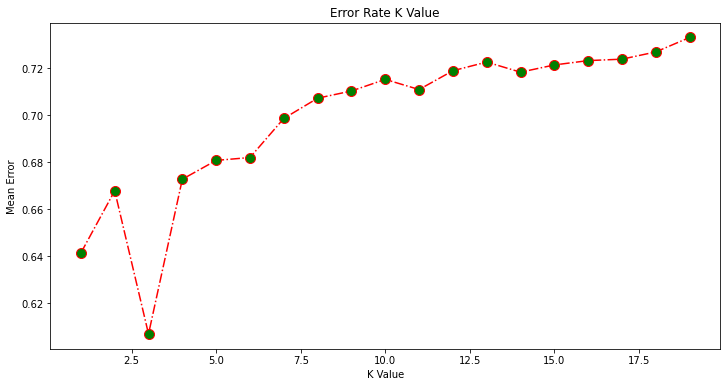

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashdot', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {knn_classifier}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier KNeighborsClassifier(n_jobs=-1, n_neighbors=2):
               precision    recall  f1-score   support

     Business       0.65      0.60      0.62       412
Entertainment       0.50      0.80      0.61       415
     Politics       0.66      0.58      0.62       383
       Sports       0.90      0.50      0.64       413

     accuracy                           0.62      1623
    macro avg       0.68      0.62      0.62      1623
 weighted avg       0.68      0.62      0.62      1623




### Post-processing

In [28]:
# save the model to disk
import pickle

filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [29]:
line = "ဒီကနေ့ ဒီဇင်ဘာလ ၂၁ ရက်နေ့ နေ့လယ်ပိုင်းမှာလည်း ရေဦးနဲ့ တန့်ဆည်မြို့နယ် နယ်နမိတ်ထိစပ်နေတဲ့နေရာနားက လိပ်ခြံရွာက ပီဒီအက်ဖ်စခန်းတွေလို့ ယူဆတဲ့နေရာတွေကို စစ်ကောင်စီတပ်ရဲ့ ရဟတ်ယာဉ်တွေက ပစ်ခတ်တာတွေ ဆက်လုပ်ခဲ့တယ်လို့ ဒေသခံတွေထံက သိရပါတယ်။"

In [31]:
stopwordslist = []
slist = []
with open("./stopword.txt", encoding = 'utf8') as stopwordsfile:
    stopwords = stopwordsfile.readlines()
    slist.extend(stopwords)

    for w in range(len(slist)):
        temp = slist[w]
        stopwordslist.append(temp.rstrip())


In [32]:
def stop_word(sentence):
  new_sentence = []
  for word in sentence.split():
    if word not in stopwordslist:
      new_sentence.append(word)
  return(' '.join(new_sentence))

In [33]:
import pyidaungsu as pds

def tokenize(line):
    sentence = pds.tokenize(line,form="word")
    sentence = ' '.join([str(elem) for elem in sentence])
    sentence = stop_word(sentence)
    return sentence

In [34]:
tokenize(line)

'ဒီဇင်ဘာ ၂၁ ရက်နေ့ နေ့လယ် ရေဦး တန့်ဆည် မြို့နယ် နယ်နမိတ် ထိစပ် နေရာ နားကလိပ်ခြံ ရွာ ပီဒီအက်ဖ်စခန်း ယူဆ နေရာ စစ်ကောင်စီ တပ် ရဟတ်ယာဉ် ပစ်ခတ် ဆက်လုပ် ဒေသခံ ။'

In [35]:
user = input("Enter a Text: ")
user = tokenize(user)
data = vectorizer.transform([user]).toarray()
output = loaded_model.predict(data)
print(output)

Enter a Text: ဒီဇင်ဘာ ၂၁ ရက်နေ့ နေ့လယ် ရေဦး တန့်ဆည် မြို့နယ် နယ်နမိတ် ထိစပ် နေရာ နားကလိပ်ခြံ ရွာ ပီဒီအက်ဖ်စခန်း ယူဆ နေရာ စစ်ကောင်စီ တပ် ရဟတ်ယာဉ် ပစ်ခတ် ဆက်လုပ် ဒေသခံ
['Politics']
